# Goal of Project:
The goal of this project is to utilized the dataset provided from Kaggle website to analyze the possible factors that affecting surivability and creating a prediction model for survivability of passengers using variables from the dataset for the Kaggle Titanic Competition
<br> <br> In addition, my personal goal for this projet is to use this project as an application for  my university module on Statistics, to make use of the statiscal tools to create inference, analysis through hypothesis testing and finally creating regression models. The Statistical methods I applied are: ANOVA, Chi-Squared Test, Bonferroni Method, Regression Modeling(Logistics & Linear Regression), Ordinal & Nominal Encoding, and Correlation Coefficient.
<br> <br>  The link to my university Statistics module information is attatched here: [SUTD Statistics Module](https://esd.sutd.edu.sg/courses/40004-statistics/)

### Context of Project
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Therefore, the goal of the project is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Methodology
To improve readability, I have broken down the notebook into these sub sections
* [1. Data Table](#point_1)
* [2. Python Packages](#point_2)
* [3. Data Exploration](#point_3)
    * [3.1 Overview of the train dataset](#point_3_1) 
    * [3.2 Handling Null values](#point_3_2) 
         * [3.21 Null Value in Age Column](#point_3_2_1)
         * [3.22 Null Value in Embarked Column](#point_3_2_2)     
* [4. Univariate Analysis](#point_4)
    * [4.1 Catergorical Variables](#point_4_1)
        * [4.11 Survived](#point_4_1_1)
        * [4.12 Pclass](#point_4_1_2)
        * [4.13 Sex](#point_4_1_3)
        * [4.14 Tickets](#point_4_1_4)
        * [4.15 Cabin](#point_4_1_5)
        * [4.16 Embarked](#point_4_1_6)
    * [4.2 Numerical Variables](#point_4_2)
        * [4.21 Age](#point_4_2_1)
        * [4.22 SibSp](#point_4_2_2)
        * [4.23 Parch](#point_4_2_3)
        * [4.24 Fare](#point_4_2_4)   
* [5. Feature Engineering](#point_5)
    * [5.1 Cabin](#point_5_1)
    * [5.2 Name](#point_5_2)
    * [5.3 Ticket](#point_5_3)
    * [5.4 SibSp and Parch](#point_5_4)
* [6. Outlier Detection](#point_6)
    * [6.1 Age](#point_6_1)
    * [6.2 Fare](#point_6_2)
* [7. Bivariate Analysis](#point_7)
    * [7.1 ANOVA Test for Numerical Variables](#point_7_1)
        * [7.11 ANOVA Test for Fare](#point_7_1_1)
        * [7.12 ANOVA Test for Age](#point_7_1_2)
    * [7.2 Chi-Squared Test & Bonferroni Method for Discrete Variables](#point_7_2)
        * [7.21 Chi-Squared Test for Sex](#point_7_2_1)
        * [7.22 Chi-Squared Test & Bonferroni Method for Pclass](#point_7_2_2)
        * [7.23 Chi-Squared Test & Bonferroni Method for Embarked](#point_7_2_3)
        * [7.24 Chi-Squared Test & Bonferroni Method for familySize](#point_7_2_4)
        * [7.25 Chi-Squared Test & Bonferroni Method for Social Status Number](#point_7_2_5)
        * [7.26 Chi-Squared Test & Bonferroni Method for Ticket](#point_7_2_6)
* [8. Multi-variate Analysis](#point_8)
    * [8.1 (Pclass, Sex, Embarked) vs Survived](#point_8_1)
    * [8.2 (Pclass, Sex, Cabin) vs Survived](#point_8_2)
    * [8.3 (Pclass, Sex, SibSp) vs Survived](#point_8_3)
    * [8.4 (Pclass, Sex, Parch) vs Survived](#point_8_4)
    * [8.5 (Pclass, Sex, Social Status Number) vs Survived](#point_8_5)
* [9. Data Transformation](#point_9)
    * [9.1 Binning Continuous Variables](#point_9_1)
        * [9.11 Age](#point_9_1_1)
        * [9.12 Fare](#point_9_1_2)
    * [9.2 Dropping Features](#point_9_2)
    * [9.3 Encoding Catergorial Variables](#point_9_3)
* [10. Model Building](#point_10)
    * [10.1 Training Model](#point_10_1)
    * [10.2 Cross Validation of Model - Using K-Fold Cross Validation](#point_10_2)
    * [10.3 Conclusion](#point_10_3)
* [11. Final Words and Acknowledgement](#point_11)

<a id="point_1"></a> 
# 1. Data Table
The breakdown of the data available and its characteristics:

- PassengerId is a unique identifying number assigned to each passenger.
- Survived is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
- Pclass is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- Name is the name of the passenger.
- Sex indicates the gender of the passenger (i.e., Male or female).
- Age indicates the age of the passenger.
- Sibsp is the number of siblings/spouses aboard.
- Parch is the number of parents/children aboard.
- Ticket indicates the ticket number issued to the passenger.
- Fare indicates the amount of money spent on their ticket.
- Cabin indicates the cabin category occupied by the passenger.
- Embarked indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

<a id="point_2"></a> 
# 2. Python Packages
We import various packages within the Python Language to aid in the code creation process.

In [35]:
""" Data Analysis Packages"""
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from patsy import dmatrices
import warnings

"""Data Visualisation Packages"""
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.graph_objs import *

"""Pre-Processing Packages"""
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

"""Modeling and Regression Packages"""
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

"""Model Evaluation"""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id="point_3"></a> 
# 3. Data Exploration
The goal of the data exploration phase is to **understand the dataset** that has been provided to us with details further substantiated in the data table in section 1. This allows us to have a brief overview of the condition of the dataset and to pre-empt myself to think about possible missing values and 'dirty' data.
<br>Therefore, we can do elementary data cleaning such as removing null values and filling in missing values.

<a id="point_3_1"></a> 
## 3.1 Overview of the train dataset
We look at the values, datatype and the state of the data.

In [3]:
#Looking at the Values and the State of the dataset
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/James/OneDrive - Singapore University of Technology and Design/Projects/Kaggle - Titanic/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Findings:** We realised that there are 3 columns in the dataset that contain null values, these 3 rows are age, cabin and embarked.

<a id="point_3_2_1"></a> 
## 3.21 Null Value in Age Column
Assigning values for the age.

### Visualizing the mean and median
Plotting box-whiskers plot and histogram plot to see the 'skewness' of the dataset. This will help us to determine if the data is skewed and guide us in choosing more appropriate values to fill into the null value entry for the Age column.

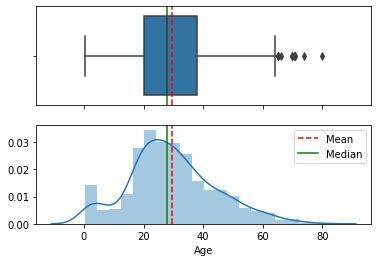

In [5]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
mean=df['Age'].mean()
median=df['Age'].median()
#mode=df['Age'].mode().get_values()[0]

sns.boxplot(df["Age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
#ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["Age"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [6]:
print("The mean age is " + str(mean))
print("The median age is " + str(median))

The mean age is 29.69911764705882
The median age is 28.0


**Findings:** We realised that the median age and the mean age is quite close with the mean age being 29.7 while the median age is 28. In addition, from observing the mean and median value and the graphical visualization, we can conclude that the Age column is right skewed. Therefore, we'll fill the age column with the mean since it will help us to correct the right skew in the Age column.

In [7]:
"""Filling the null rows with the mean value"""
df['Age'] = df['Age'].fillna(float(mean)) 

In [8]:
"""Checking that all the null value rows are filled"""
df['Age'].isnull().sum()

0

<a id="point_3_2_2"></a> 
## 3.22 Null Value in Embarked Column
The nature of the embarked column is catergorical vairable and we observe that there are only 3 unique values for the Port of Embarkation, therefore we would use a different approach to handle the null value as comapred to the Age column. In this case, we observe that the Port S has the highest number of passengers boarding, therefore there's a higher probability that the missing data passenger embarked from Port S and we'll fill it in.

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#For the Nan values, we assigned them to the highest volume port which is S. Since there's a higher probability of the entry from that port.
def embarked_null(x):
    if isinstance(x, str) == False:
        return 'S'
    else:
        return x
df['Embarked'] = df['Embarked'].apply(embarked_null)

**Conclusion:** Therefore in this data explaratory phase, we have identified the columns that have missing value and filled up with values we deemed are the most appropriate by observing the column in its entirety. For now, this elementary step into the project will allow us to have a cleaner dataset to work with and we'll perform various task along the notebook to aid in our analysis.

<a id="point_4"></a> 
# 4. Univariate Analysis
In this next section, we'll utilised univariate analysis, which separately explores the distribution of each variable in a data set. It looks at the range of values, as well as the central tendency of the values. 
<br>Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own. 
<br>Methods to perform univariate analysis will depend on whether the variable is categorical or numerical. 
<br> (1) For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using **histogram and density plots**. 
<br> (2) For categorical variables, we would use **bar plots** to visualize the absolute and proportional frequency distribution.

In [11]:
#Listing all the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<a id="point_4_1"></a> 
## 4.1 Catergorical Variables

<a id="point_4_1_1"></a> 
### 4.11 Survived
Bar plot of the frequency of the survival status.

In [12]:
def survival_status(x):
    x = int(x)
    if x == 0:
        return "Did not survive"
    else:
        return "Survive"
df["Survived"] = df["Survived"].apply(survival_status)

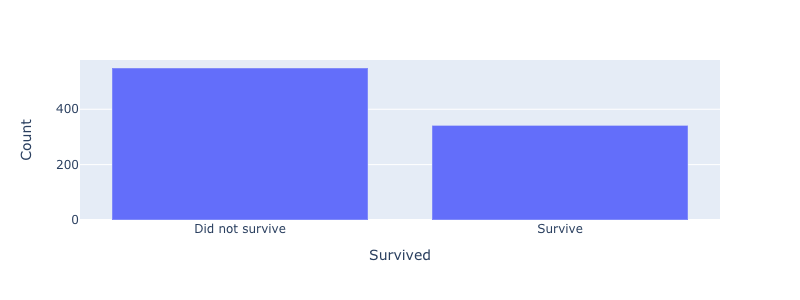

In [13]:
df_Survived_Count = df['Survived'].value_counts().rename_axis('Survived').reset_index(name='Count')
df_Survived_Count

#Matplotlib Style
# plt.bar(df_Survived_Count['Survived'], df_Survived_Count['Count'])
# plt.title('Frequency counter for the Survivability of Passengers')
# plt.xlabel('Survivable Status')
# plt.ylabel('Frequency')

#Plotly Style
fig = px.bar(df_Survived_Count, x = 'Survived', y = 'Count')
fig.update_layout(width=800,height=300)
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Findings**: There were significantly more people who did not survive the accident, which aligns with the project background where it's stated that there's not enough lifeboats for all the passengers and there's a high death toll. Next, we'll like to observe if there's any varations the different ticket classes onboard the Titanic.

<a id="point_4_1_2"></a> 
### 4.12 Pclass(Ticket Class)
Bar plot of the frequency of the Ticket Class.

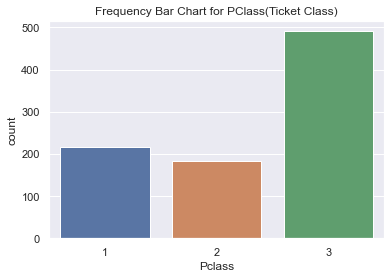

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data=df).set_title('Frequency Bar Chart for PClass(Ticket Class)')

**Findings**: We note that there's a much larger proportion of 3rd class ticket sold, while there's around half the amount of tickets sold for the 1st and 2nd class tickets which is similar to the seat allocation in modern airlines.

<a id="point_4_1_3"></a> 
### 4.13 Sex
Bar plot of the frequency of the Sex.

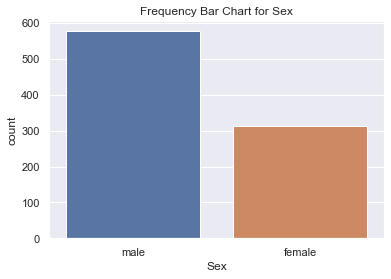

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Sex", data=df).set_title('Frequency Bar Chart for Sex')

**Findings**: There were more male compared to female passengers onboard the ship.

<a id="point_4_1_4"></a> 
### 4.14 Tickets

In [16]:
print("The number of unique ticket values: " + str(len(list(df['Ticket'].unique()))))
print("The total number of tickets were: " + str(df['Ticket'].count()))

The number of unique ticket values: 681
The total number of tickets were: 891


**Findings**: There are many unique catergorical values for the ticket id therefore, we would need to perform more pre-processing.

<a id="point_4_1_5"></a> 
### 4.15 Cabin
**Findings:** From the Data Exploation phase at 3.1, we discovered that there's a large number of null values, therefore we would require to do more data manipulation later on.

<a id="point_4_1_6"></a> 
### 4.16 Embarked
Bar plot of the frequency of the port of embarkation.

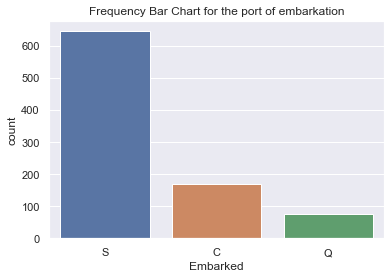

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Embarked", data=df).set_title('Frequency Bar Chart for the port of embarkation')

**Findings**: We visually oberseved that most poeple boarded at a Port S compared to the other 2 ports.

## 4.2 Numerical Variables
To explore the numerical variables, we utilised data visualisation with Density Plot and Histogram to see the total count and frequency of each individual variable. The custom code for the creation of a new function: "plotHistogram", to create density and barplots used for the numerical variables later on

In [18]:
#Plotting Histogram
def plotHistogram(variable):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {variable.name} with Histogram", f"Distribution of {variable.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            marker = dict(color = "chocolate")
        ),
    row=1,col=1)
    
    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            histnorm = "density",
            marker = dict(color = "darkred")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=400, 
        width=800,
        hovermode="closest",
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

<a id="point_4_2_1"></a> 
### 4.2.1 Age
Bar plot of the frequency of the Age.

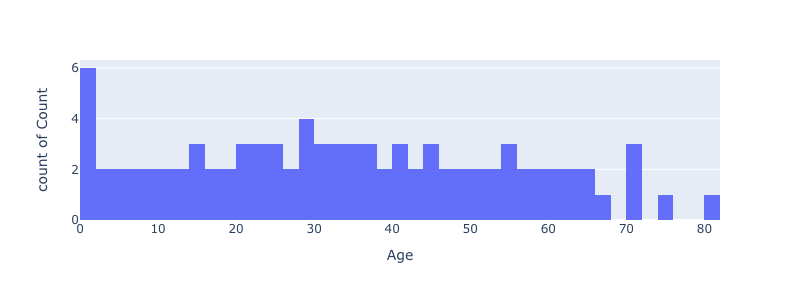

In [46]:
df_Age_Count = df['Age'].value_counts().rename_axis('Age').reset_index(name='Count')
df_Age_Count

#Matplotlib Style
# plt.bar(df_Age_Count['Age'], df_Age_Count['Count'])
# plt.title('Frequency counter for the Survivability by Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')

#Plotly Style
fig = px.histogram(df_Age_Count, x="Age", y='Count',nbins=50)
fig.update_layout(width=800,height=300)
#fig.show('notebook')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Findings**: The age distributions shows that the majority of the passengers on board were middle age with more children than elderly people, where the working adults class had the greatest disposable income to justify the cost of the ticket.

<a id="point_4_2_2"></a> 
### 4.2.2 Sibsp (# of siblings/spouse on board)
Bar plot of the frequency of the number of siblings/spouse on board.

Text(0, 0.5, 'Frequency')

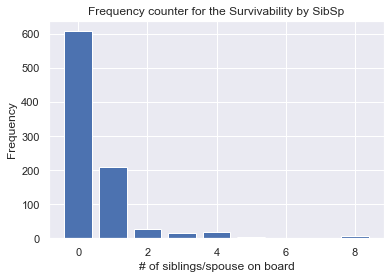

In [20]:
df_SibSp_Count = df['SibSp'].value_counts().rename_axis('SibSp').reset_index(name='Count')
df_SibSp_Count
#Matplotlib Style
plt.bar(df_SibSp_Count['SibSp'], df_SibSp_Count['Count'])
plt.title('Frequency counter for the Survivability by SibSp')
plt.xlabel('# of siblings/spouse on board')
plt.ylabel('Frequency')
#Plotly Style - Unable to render pdf export therefore using matplotlib
#plotHistogram(df.Age)
#plotHistogram(df.SibSp)

**Findings**: Most of the passengers travelling on the ship was mainly individuals travellers, with some travelling with someone else, most likely their spouse and very few families.

<a id="point_4_2_3"></a> 
### 4.2.3 Parch(# Parents/Children on board)
Bar plot of the frequency of the # Parents/Children on board.

Text(0, 0.5, 'Frequency')

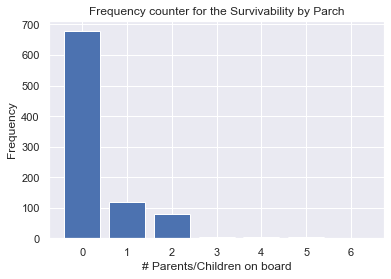

In [21]:
df_Parch_Count = df['Parch'].value_counts().rename_axis('Parch').reset_index(name='Count')
df_Parch_Count
#Matplotlib Style
plt.bar(df_Parch_Count['Parch'], df_Parch_Count['Count'])
plt.title('Frequency counter for the Survivability by Parch')
plt.xlabel('# Parents/Children on board')
plt.ylabel('Frequency')
#Plotly Style - Unable to render pdf export therefore using matplotlib
#plotHistogram(df.Parch)

<a id="point_4_2_4"></a> 
### 4.2.4 Fare
Bar plot of the frequency of the Fare.

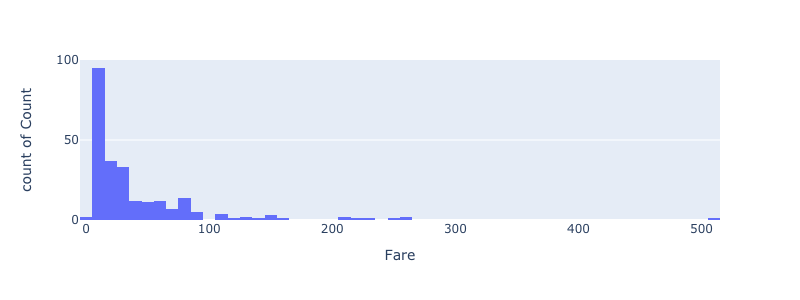

In [44]:
df_Fare_Count = df['Fare'].value_counts().rename_axis('Fare').reset_index(name='Count')
#Matplotlib Style
# plt.bar(df_Fare_Count['Fare'], df_Fare_Count['Count'], color = 'c0')
# plt.title('Frequency counter for the Survivability by Fare')
# plt.xlabel('Fare')
# plt.ylabel('Frequency')

#Plotly Style
fig = px.histogram(df_Fare_Count, x="Fare", y='Count',nbins=100)
fig.update_layout(width=800,height=300)
#fig.show('notebook')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Findings**: Majority of the ticket prices were at the lower end while there were fewer higher priced tickets

<a id="point_5"></a>
# 5. Feature Engineering
In this section, we would either modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section. This will allows us to extract information from the dataset which may appear eitherwise convoluted with data that may be 'messy' and have no pattern in its raw form. 
<br>There are various methods that we employed for the different features in this section, and they are explicitly stated below.
* Features that we would be focusing on: Cabin, Name, Parch and Ticket

<a id="point_5_1"></a>
# 5.1 Cabin
With the large number of different unique valeus of the cabin id, we wanted to investigate if there's a general class of cabin that we can derive. We realised that for the cabin id, the id is split into the first alphabet and subsequent numbers. We postualate that the first alphabet is the class of the cabin and the number represents the room number.

In [66]:
#Take only the class of the cabin
def cabin_class(x):
    x1 = str(x)
    x2 = x1[0] 
    x3 = x2.upper()
    return x3
    
df["Cabin"] = df["Cabin"].apply(cabin_class)

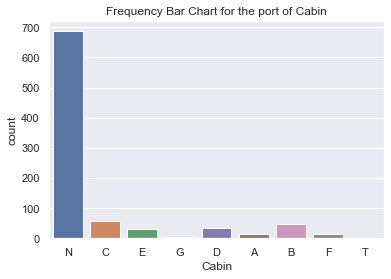

In [67]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Cabin", data=df).set_title('Frequency Bar Chart for the port of Cabin')

**Findings:** We set the NaN values to be N and we realised that other than the NaN values, the largest number of cabins is Cabin B & C

<a id="point_5_2"></a>
# 5.2 Name
For the name column, we realised that there are rows that have different salutations for the name which may allow us to get not only the sex but the social status of the individual. Therefore, we performed various split function to get the person salutation.

In [68]:
df[["Name"]]

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
..                                                 ...
886                              Montvila, Rev. Juozas
887                       Graham, Miss. Margaret Edith
888           Johnston, Miss. Catherine Helen "Carrie"
889                              Behr, Mr. Karl Howell
890                                Dooley, Mr. Patrick

[891 rows x 1 columns]

We realised that the Salutation always follows a puntuation mark(.) behind it, and therefore, we can use it to get the more easily extract the salutation

In [69]:
#Performing strip function
df['SirName'] = df['Name']
df.SirName = df.SirName.str.split(".")
def get_surname_1(x):
    return x[0]
df.SirName = df.SirName.apply(get_surname_1)
df.SirName = df.SirName.str.split(", ")
def get_surname_2(x):
    return x[1]
df.SirName = df.SirName.apply(get_surname_2)


In [70]:
df['SirName'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Capt              1
Ms                1
Mme               1
Jonkheer          1
Don               1
the Countess      1
Sir               1
Name: SirName, dtype: int64

In [71]:
#Transforming the less frqeuent values
"""Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it."""
df['SirName'].replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

"""Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat."""
df['SirName'].replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

"""Finally Replace Mlle and Ms with Miss. And Mme with Mrs."""
df['SirName'].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

"""Replace the Aristocrat with Aristocrat"""
df['SirName'].replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

df['SirName'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Officer        18
Aristocrat      5
Name: SirName, dtype: int64

### Converting into ordinal values from catergorical variables
We create 3 levels to encode the catergorical variables into ordinal values.
<br>1 is the for ordinary citizens with salutations Mr, Miss and Mrs. 2 is for higher level which is Master. 3 for Officer. 4 for Aristocrat.

In [72]:
#Function that converts the catergorical variables into ordinal values
def social_status_number(x):
    if x == 'Mr' or x == 'Miss' or x == 'Mrs':
        return 1
    elif x == 'Master':
        return 2
    elif x == 'Officer':
        return 3
    else:
        return 4
df['Social Status Number'] = df['SirName'].apply(social_status_number)

**Findings:** There is a large proportion of "ordinary citizens" and there were a few high ranking members of society such as the Master, Officer and Aristocrat.

<a id="point_5_3"></a>
## 5.3 Ticket
We realised that there are many unique values for the column in Ticket and therefore we would want to generalise the values to get fewer distinct results. I decided to take the remove all the other values in the string other than the first value to create a catergory based off this first value.

In [73]:
#We write a function that takes the first index of the string. If it's a number, then it would return a string 'Number', else it would return the first index of the string 
def ticket_algo(x):
    x1 = x.split()
    x2 = x1[0][0]
    
    if x2.isdigit() == True:
        return 'Number'
    else:
        return x2

df['Ticket'] = df['Ticket'].apply(ticket_algo)

In [74]:
df['Ticket'].head()

0         A
1         P
2         S
3    Number
4    Number
Name: Ticket, dtype: object

In [75]:
print(df['Ticket'].unique())
print('The new number of unique ticket values are ' + str(len(df['Ticket'].unique())))

['A' 'P' 'S' 'Number' 'C' 'W' 'F' 'L']
The new number of unique ticket values are 8


**Findings:** There are 8 unique ticket values which are 'A' 'P' 'S' 'Number' 'C' 'W' 'F' 'L'.

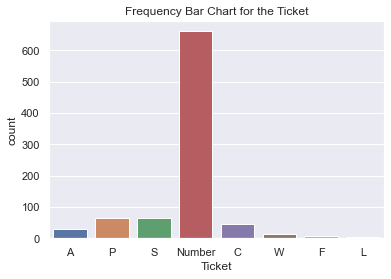

In [76]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Ticket", data=df).set_title('Frequency Bar Chart for the Ticket')

<a id="point_5_4"></a>
## 5.4 SibSp and Parch
The 2 variables are highly correlated to one another where SibSp: No. of siblings and Parch: No. of relatives, therefore we perform a function to create a new variable called 'familySize' that merge these two features.

In [77]:
"""Merge SibSp and Parch to create a variable Family_size."""
df["familySize"] = df.SibSp + df.Parch + 1  # Adding 1 for single person
print("Categories in Family_size:")
display(df.familySize.value_counts())

Categories in Family_size:


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familySize, dtype: int64

In [78]:
"""Create buckets of single, small, medium, and large and then put respective values into them."""
df.familySize.replace(to_replace = [1], value = "single", inplace = True)
df.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
df.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
df.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

**Conclusion:** Therefore, through our feature engineering section, we were able to manipulate the features to create more actionable values in the columns that we can subsequently use for our analysis and regression.

<a id="point_6"></a>
# 6. Outlier Detection
We intend to look at the numerical variables(more specfically age and fare) to determine the spread of data with the box and wiskers diagram to better ascertain the outliers. We do not create the box and wiskers diagram for Parch and SibSp due to the small spread of the data.[](http://)

<a id="point_6_1"></a>
## 6.1 Age

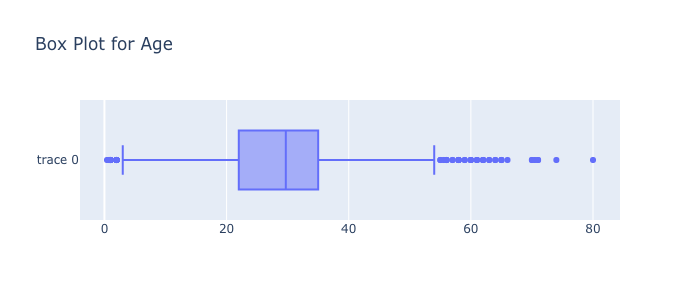

In [113]:
#Matplotlib Style
# plt.figure(figsize=(16, 2))
# plt.title('Box plot for Age distribution')
# plt.xlabel('Age')
# ax = sns.boxplot(x=df['Age'])
#Plotly Style - Unable to render pdf export therefore using matplotlib
fig = go.Figure()
fig.add_trace(go.Box(x=df['Age']))
fig.update_layout(height=300, title_text='Box Plot for Age')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Findings:** We realised that there's large proportion of data that occurs outside of the upper and lower limit of the box plot. The data of the age is tended towards left skewed as seen from the graph above. However, I have decided to keep all the values inside as it falls within the reasonable region from age 0.42 to 80, which seems like the reasonable life expectancy during that period. 


<a id="point_6_2"></a>
## 6.2 Fare

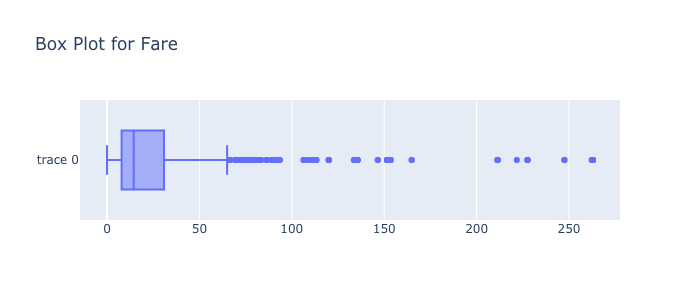

In [112]:
#Matplotlib Style
# plt.figure(figsize=(16, 2))
# plt.title('Box plot for Fare distribution')
# plt.xlabel('Fare')
# ax = sns.boxplot(x=df['Fare'])
#Plotly Style - Unable to render pdf export therefore using matplotlib
fig = go.Figure()
fig.add_trace(go.Box(x=df['Fare']))
fig.update_layout(height=300, title_text='Box Plot for Fare')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

** Findings:** The fare seem to have a large outlier who fare cost over 500 dollars, and the outliers exist on the upper limit. Looking at the graph, we can see that the data for the fare is right skewed. The large deviation from the upper limit would result in the data being skewed and affecitng the accuracy of the data, therefore, I've decided to remove the points from 265 dollars and above.

In [81]:
#Removing the outliers which has value of 200 dollars and above.
df = df[df['Fare']< 265]

In [82]:
#Remove unecessary columns
df1 = df.drop(['Name', 'SirName'], axis=1)
df1.head()

PassengerId         Survived  Pclass     Sex   Age  SibSp  Parch  Ticket  \
0            1  Did not survive       3    male  22.0      1      0       A   
1            2          Survive       1  female  38.0      1      0       P   
2            3          Survive       3  female  26.0      0      0       S   
3            4          Survive       1  female  35.0      1      0  Number   
4            5  Did not survive       3    male  35.0      0      0  Number   

      Fare Cabin Embarked  Social Status Number familySize  
0   7.2500     N        S                     1      small  
1  71.2833     C        C                     1      small  
2   7.9250     N        S                     1     single  
3  53.1000     C        S                     1      small  
4   8.0500     N        S                     1     single

**Conclusion:** Therefore, through the outier detection section, we were able scope out the extent of the outliers. For the Fare, we have remove a single outlier which may result in a large skew in our results if we were to perform normalisation later on and affecting the accuracy of our regression model.

<a id="point_7"></a>
## 7. Bivariate Analysis
The next step after we have perform single variable analysis is to compare 2 variables(Bivariate Analysis). We first standardise the dataset where the values is centered around 0 and with a standard deviation of 1, while avoiding normalisation which we identified earlier which may result in the skewing of the values.
<br> Our approach is to use statistical methods to create quantitative results compared against survivability, which is further substantiated by graphical visualisations.
<br> There are 2 Statistical methods used:
<br> (1) ANOVA: We used ANOVA to compare the mean of 2 groups of value for **numerical values.**
<br> (2) Chi-Squared Test: We use Chi-Sqaured Test to compare the mean of 2 groups of value for **catergorical values.**
<br> The row in question would be the column that we are testing against the Survivability target variable(which is **catergorical value**)

<a id="point_7_1"></a>
## 7.1 ANOVA Test for Numerical Variables
This subsection, we perform ANOVA test for the columns that are numerical(Continuous). The ANOVA test that we would be performing for this sub-section 8.2 is the one way ANOVA where we'll be focusing on comparing the the mean value for two population set(Survived and Not-Survived).

The ANOVA(ANalysis Of VAriance) test lets us check whether a numeric response variable varies according to the levels (or class) of a categorical variable. When I simply refer to 'ANOVA', for this exmaple I mean the 'one way' ANOVA which is a test for exploring the impact of one single factor on three or more groups (but two groups would also do, as we explain below).
The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? The null hypothesis is all of the group means are equal. And the alternate hypothesis is any of the group means differ from one another.

<br> H0(Null Hypothesis): mean of Fare(Survived) == mean of Fare(Did not Survived)
<br> H1(Alternative Hypothesis): mean of Fare(Survived) != mean of Fare(Did not Survived)

We can reject the null hypothesis when the p-value calculated below is smaller than my defined level of significance of 0.01 which means that that the mean of one group differ from the other.

In [119]:
%%html
<img src="ANOVA Test.png", width = 500>

<a id="point_7_1_1"></a>
## 7.11 ANOVA Test for Fare

In [84]:
numVariable = df1['Fare']
catVariable = df1['Survived']
#Seperating into the 2 different population dataset
groupNumVariableByCatVariable0 = numVariable[catVariable == 'Did not survive']
groupNumVariableByCatVariable1 = numVariable[catVariable == 'Survive']

fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0)
print('The F value is: ' + str(round(fValue,5)))
print('------------------------')
print('The p value is: ' + str(pValue))

The F value is: 65.16293
------------------------
The p value is: 2.238849806904949e-15


**Findings:** We calculate the p-value to be very small(less than 0.01 level of significance), therefore we can reject the null hypothesis. We can conclude that the mean of the two columns are different and their interaction is statistically significant.

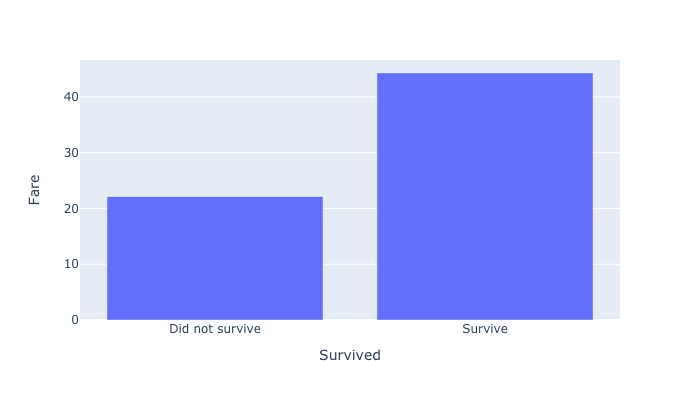

In [111]:
# Graphical Visualisation
df_groupedby_fare = df1[['Fare','Survived']]
df_groupedby_fare = df_groupedby_fare.groupby(['Survived']).mean()
df_groupedby_fare.reset_index(inplace = True)

#Matplotlib Style
# plt.bar(df_groupedby_fare['Survived'], df_groupedby_fare['Fare'])
# plt.title('Frequency counter for the Survivability by Fare')
# plt.xlabel('Survived')
# plt.ylabel('Fare')

#Plotly Style
fig = px.bar(df_groupedby_fare, x='Survived', y='Fare', height=400)
# fig.show('notebook')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Conclusion:** The graphical representation further supports the ANOVA analysis that there's a correlation between the survivability and fare. And we can observe from the bar plots that the average fare is higher for passengers who survivied.

<a id="point_7_1_2"></a>
## 7.12 ANOVA Test for Age

In [103]:
numVariable = df1['Age']
catVariable = df1['Survived']
#Seperating into the 2 different population dataset
groupNumVariableByCatVariable0 = numVariable[catVariable == 'Did not survive']
groupNumVariableByCatVariable1 = numVariable[catVariable == 'Survive']

fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0)
print('The F value is: ' + str(round(fValue,5)))
print('------------------------')
print('The p value is: ' + str(pValue))

The F value is: 4.60182
------------------------
The p value is: 0.03220925303128505


**Findings:** We calculate the p-value and it's larger than 0.01 level of significance, therefore we do not reject the null hypothesis. We can conclude that the mean of the two columns are same and their interaction is statistically insignificant.

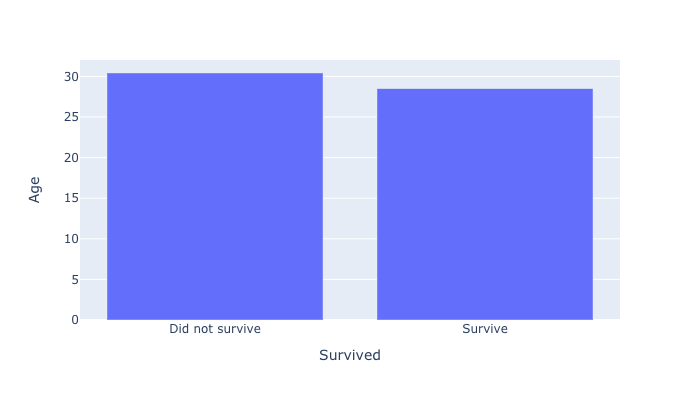

In [110]:
#Graphical Visualisation
df_groupedby_age = df1[['Age','Survived']]
df_groupedby_age = df_groupedby_age.groupby(['Survived']).mean()
df_groupedby_age.reset_index(inplace = True)

#Matplotlib Style
# plt.bar(df_groupedby_age['Survived'], df_groupedby_age['Age'])
# plt.title('Frequency counter for the Survivability by Age')
# plt.xlabel('Survived')
# plt.ylabel('Age')

#Plotly Style
fig = px.bar(df_groupedby_age, x='Survived', y='Age', height=400)
#fig.show('notebook')
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Conclusion:** The graphical representation further supports the ANOVA analysis that there's no correlation between the survivability and fare. And the average age does not have a strong relationship with survivability.

<a id="point_7_2"></a>
## 7.2 Chi-Squared Test for Discrete Variables
This subsection, we perform Chi-Squared test for the columns that are Catergorical(Discrete).

<br> The Chi-square test of independence tests if there is a significant relationship between two categorical variables.The data is usually displayed in a cross-tabulation format with each row representing a category for one variable and each column representing a category for another variable. Chi-square test of independence is an omnibus test.That is it tests the data as a whole. This means that one will not be able to tell which levels (categories) of the variables are responsible for the relationship.


<br>Null Hypothesis, H0: pij == pi*pj
<br>Alternative Hypothesis, Ha: p1 != p2
<br>Where p1 = Survivability
<br>& p2 = Predictor variable investigated

<br> Interpretation: The null hypothesis suggest that the two variables are indepedent and their relationship is statiscally not significiant. This happens when the p-value that we caculate below is smaller than my set level of significance of 0.01.

**Formulas:**
<br> Expected Frequency(eij) = (ni*nj)/n
<br> Test Statistic Value: ΣΣ ((nij-eij)^2)/eij

In [121]:
%%html
<img src="Chi-Squared Test.png", width = 500>

<a id="point_7_2_1"></a>
## 7.21 Chi-Squared Test for Sex

In [106]:
#We first need to compute the frequency of each unique value of "Sex" and "Survived" showing up so we use the crosstab function in pandas
X = df1['Sex']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
262.28250014655595
-------------------------
===Degrees of Freedom===
1
-------------------------
===P-Value===
5.457500875296423e-59
-------------------------
===Contingency Table===
[[193.51013514 119.48986486]
 [355.48986486 219.51013514]]


**Findings:** The expected frequency value is greater than 5, therefore we can conclude that this chi-squared test is reliable. The p value is very small and less than the 0.01 level of significance therefore we can reject the null hypthesis where survivability and sex are not independent and there's statistical significance in their relationship.

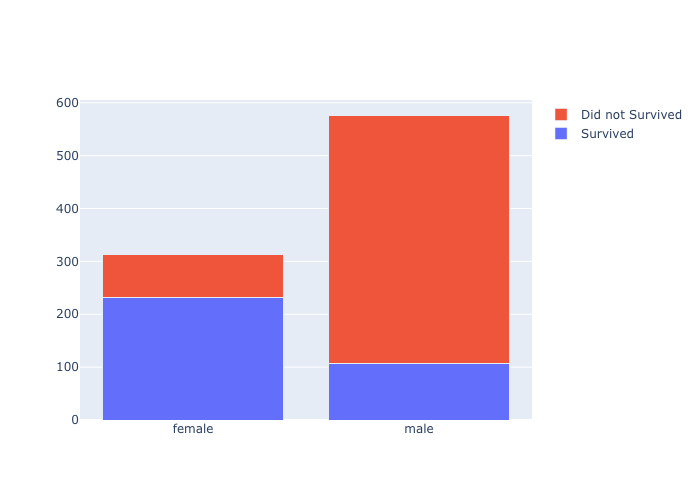

In [108]:
#Graphical Visualisation
X = array_by_survived.index
fig = go.Figure(data=[
    go.Bar(name='Survived', x = X, y=array_by_survived['Survive']),
    go.Bar(name='Did not Survived', x = X, y=array_by_survived['Did not survive'])
])
fig.update_layout(barmode='stack')
#fig.show()

img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

**Conclusion:** This is further supported by graphical visualization where it can be seen that the survival rate of the different sex is almost 200%. Where there were more female survival than male survival.

<a id="point_7_2_2"></a>
## 7.22 Chi-Squared Test & Bonferroni Method for Pclass

In [59]:
#We first need to compute the frequency of each unique value of "Pclass" and "Survived" showing up so we use the crosstab function in pandas
X = df1['Pclass']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
100.02781293542104
-------------------------
===Degrees of Freedom===
2
-------------------------
===P-Value===
1.9021133892748734e-22
-------------------------
===Contingency Table===
[[131.68581081  81.31418919]
 [113.75675676  70.24324324]
 [303.55743243 187.44256757]]


**Findings:** We realised that the p value is much smaller than the level of significance of 0.01, thefreo we can reject the null hypothesis and use the assert the claim that they are do not occur independent of one another. However, since there are 3 columns for the 3 Pclass, we would need to conduct Bonferroni method to determine which pair is the claim applicable for.

In [60]:
#Bonferroni Method
catVariable = df1['Pclass']
def calculateBonferroniAdjusted(catVariable, targetCatVariable=df1['Survived']):
    catEncoded = pd.get_dummies(catVariable)
    for column in catEncoded.columns:
        catGroupedByCatTarget = pd.crosstab(index = catEncoded[column], columns = targetCatVariable)
        testResult = stats.chi2_contingency(catGroupedByCatTarget)
        print(f"Bonferroni-adjusted pvalue between {catVariable.name}({column}) and {targetCatVariable.name}:")
        print(f"{testResult}\n")
        
calculateBonferroniAdjusted(catVariable)

Bonferroni-adjusted pvalue between Pclass(1) and Survived:
(68.56186974490439, 1.2295874635120068e-16, 1, array([[417.31418919, 131.68581081],
       [257.68581081,  81.31418919]]))

Bonferroni-adjusted pvalue between Pclass(2) and Survived:
(7.676162991727304, 0.005595501892070844, 1, array([[435.24324324, 268.75675676],
       [113.75675676,  70.24324324]]))

Bonferroni-adjusted pvalue between Pclass(3) and Survived:
(89.10021780959457, 3.753096493882017e-21, 1, array([[245.44256757, 151.55743243],
       [303.55743243, 187.44256757]]))



**Conclusion:** From the Chi-Squared test,we determine that the Pclass has an association with Survival rate. And conducting the Bonferroni method, we determine that the Pclass(1) and Pclass(3) has the greatest association.

<a id="point_7_2_3"></a>
## 7.23 Chi-Squared Test & Bonferroni Method for Embarked

In [61]:
#We first need to compute the frequency of each unique value of "Embarked" and "Survived" showing up so we use the crosstab function in pandas
X = df1['Embarked']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
23.755398211655933
-------------------------
===Degrees of Freedom===
2
-------------------------
===P-Value===
6.943538064225584e-06
-------------------------
===Contingency Table===
[[102.01013514  62.98986486]
 [ 47.60472973  29.39527027]
 [399.38513514 246.61486486]]


**Findings:** Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is less than 0.01). Thus, the results indicate that there is a statistically significant relationship between the variables Embarked and Survived.

In [62]:
#Bonferroni Method
catVariable = df1['Embarked']
def calculateBonferroniAdjusted(catVariable, targetCatVariable=df1['Survived']):
    catEncoded = pd.get_dummies(catVariable)
    for column in catEncoded.columns:
        catGroupedByCatTarget = pd.crosstab(index = catEncoded[column], columns = targetCatVariable)
        testResult = stats.chi2_contingency(catGroupedByCatTarget)
        print(f"Bonferroni-adjusted pvalue between {catVariable.name}({column}) and {targetCatVariable.name}:")
        print(f"{testResult}\n")
        
calculateBonferroniAdjusted(catVariable)

Bonferroni-adjusted pvalue between Embarked(C) and Survived:
(22.165038820634948, 2.501884443118095e-06, 1, array([[446.98986486, 276.01013514],
       [102.01013514,  62.98986486]]))

Bonferroni-adjusted pvalue between Embarked(Q) and Survived:
(0.0006608383540752759, 0.9794912188402782, 1, array([[501.39527027, 309.60472973],
       [ 47.60472973,  29.39527027]]))

Bonferroni-adjusted pvalue between Embarked(S) and Survived:
(17.69431927503817, 2.5940012400823307e-05, 1, array([[149.61486486,  92.38513514],
       [399.38513514, 246.61486486]]))



**Conclusion:** From the Chi-Squared test,we determine that the Embakred has an association with Survival rate. And conducting the Bonferroni method, we determine that the Embarked(C) and Embarked(S) has the greatest association, while Embarked(Q) has not statistical significance).

<a id="point_7_2_4"></a>
## 7.24 Chi-Squared Test & Bonferroni Method for familySize
Sibsp is the number of siblings/spouses aboard.

In [63]:
#We first need to compute the frequency of each unique value of "familySize" and "Survived" showing up so we use the crosstab function in pandas
X = df1['familySize']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
66.28923546149498
-------------------------
===Degrees of Freedom===
3
-------------------------
===P-Value===
2.657946876318212e-14
-------------------------
===Contingency Table===
[[ 29.05743243  17.94256757]
 [ 27.2027027   16.7972973 ]
 [330.76013514 204.23986486]
 [161.97972973 100.02027027]]


**Findings:** Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is less than 0.01). Thus, the results indicate that there is a statistically significant relationship between the variables familySize and Survived.

In [64]:
#Bonferroni Method
catVariable = df1['familySize']
def calculateBonferroniAdjusted(catVariable, targetCatVariable=df1['Survived']):
    catEncoded = pd.get_dummies(catVariable)
    for column in catEncoded.columns:
        catGroupedByCatTarget = pd.crosstab(index = catEncoded[column], columns = targetCatVariable)
        testResult = stats.chi2_contingency(catGroupedByCatTarget)
        print(f"Bonferroni-adjusted pvalue between {catVariable.name}({column}) and {targetCatVariable.name}:")
        print(f"{testResult}\n")
        
calculateBonferroniAdjusted(catVariable)

Bonferroni-adjusted pvalue between familySize(large) and Survived:
(10.379766621629656, 0.0012740379782349702, 1, array([[519.94256757, 321.05743243],
       [ 29.05743243,  17.94256757]]))

Bonferroni-adjusted pvalue between familySize(medium) and Survived:
(4.551679194492186, 0.03288647907702878, 1, array([[521.7972973, 322.2027027],
       [ 27.2027027,  16.7972973]]))

Bonferroni-adjusted pvalue between familySize(single) and Survived:
(36.39189381451254, 1.6137298173332725e-09, 1, array([[218.23986486, 134.76013514],
       [330.76013514, 204.23986486]]))

Bonferroni-adjusted pvalue between familySize(small) and Survived:
(49.55853026984799, 1.9254086446630234e-12, 1, array([[387.02027027, 238.97972973],
       [161.97972973, 100.02027027]]))



**Conclusion:** From the Chi-Squared test,we determine that the familySize has an association with Survival rate. And conducting the Bonferroni method, we determine that the familySize(large) and familySize(single) has the greatest association, while familySize(samll) and familySize(medium) has low statistical significance).

<a id="point_7_2_5"></a>
## 7.25 Chi-Squared Test & Bonferroni Method for Social Status Number

In [65]:
#We first need to compute the frequency of each unique value of "Social Status Number" and "Survived" showing up so we use the crosstab function in pandas
X = df1['Social Status Number']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
8.410420018161204
-------------------------
===Degrees of Freedom===
3
-------------------------
===P-Value===
0.03824906480824373
-------------------------
===Contingency Table===
[[510.05067568 314.94932432]
 [ 24.72972973  15.27027027]
 [ 11.12837838   6.87162162]
 [  3.09121622   1.90878378]]


**Findings:** Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

<a id="point_7_2_6"></a>
## 7.26 Chi-Squared Test & Bonferroni Method for Ticket

In [66]:
#We first need to compute the frequency of each unique value of "Ticket" and "Survived" showing up so we use the crosstab function in pandas
X = df1['Ticket']
y = df1['Survived']

array_by_survived = pd.crosstab(index = X, columns = y)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(array_by_survived)
print("===Chi2 Stat===")
print(chi2_stat)
print('-------------------------')
print("===Degrees of Freedom===")
print(dof)
print('-------------------------')
print("===P-Value===")
print(p_val)
print('-------------------------')
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
33.61223259472089
-------------------------
===Degrees of Freedom===
7
-------------------------
===P-Value===
2.035402825644801e-05
-------------------------
===Contingency Table===
[[ 17.92905405  11.07094595]
 [ 29.05743243  17.94256757]
 [  4.3277027    2.6722973 ]
 [  2.47297297   1.52702703]
 [408.65878378 252.34121622]
 [ 38.33108108  23.66891892]
 [ 40.18581081  24.81418919]
 [  8.03716216   4.96283784]]


**Findings:** Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

**Conclusion:** The bivariate analysis brought much clarity to me on the factors that had an impact on the survivability of the passengers through statistical significance. However for the Ticket and Social Status Number feature, I'm unable to conduct Chi-Squared test due to the expected frequencies not reaching a threshold where I can be confident of the statistical significance.

<a id="point_8"></a>
## 8. Multi-Variate Analysis
In multivariate analysis, we try to find the relationship among more than two variables. Number of predictor variable in bivariate analysis was one. On the contrary, number of predictor variables for multivariate analysis are more than one. More specifically, we will try to associate more than one predictor variable with the response variable. We will just visualize the impact of different predictor variables (3 variables) at a time on variable Survived. We'll be using bar plots to represent the different permutations of the predictor variables.

There'll a large number of permutation of the combination of the multivariate analysis(9C3 = 84 ways to be specific), therefore I'll be performing specific analysis on the factors that I would like to more imperatively want to have a clearer picture of.

In [67]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Social Status Number',
       'familySize'],
      dtype='object')

In [68]:
def multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived']):
    #Perform crosstab to create dataframe used for plotting
    catGroupedByCatTarget = pd.crosstab(index = [catVar1, catVar2, catVar3], columns = targetVaraible, normalize='index')*100
    #Setting the dimensions for the plot
    fig,ax = plt.subplots(1,1,figsize = (18,3))
    fontSize = 15
    #
    catGroupedByCatTarget.rename({0:"%Died", 1:"%Survived"}, axis = 1, inplace = True)
    catGroupedByCatTarget.plot.bar(color = ["red", "green"],ax=ax)
    ax.set_xlabel(f"{catVar1.name},{catVar2.name},{catVar3.name}", fontsize = fontSize)
    ax.set_ylabel("Relative Frequency(%)", fontsize = fontSize)
    ax.tick_params(axis="x", labelsize=fontSize)
    ax.tick_params(axis="x", labelsize=fontSize)
    plt.legend(loc = "best")
    return plt.show()

<a id="point_8_1"></a>
## 8.1 (Pclass, Sex, Embarked) vs Survived

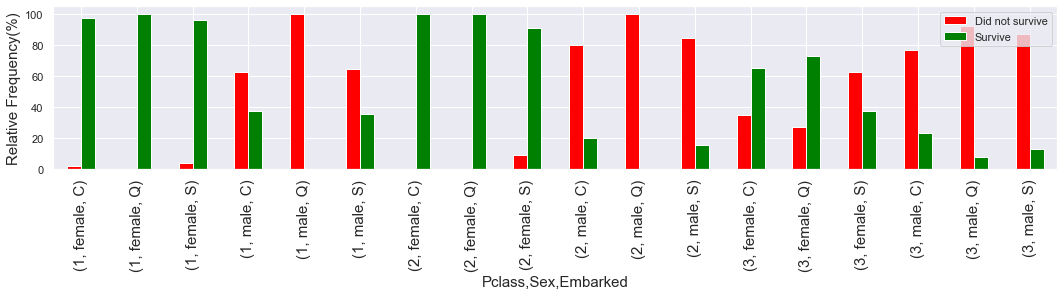

In [69]:
catVar1 = df1['Pclass']
catVar2 = df1['Sex']
catVar3 = df1['Embarked']
multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived'])

**Findings:** Across the x-axis, it seems like the sex had the biggest contribution to the survivability.

<a id="point_8_2"></a>
## 8.2 (Pclass, Sex, Cabin) vs Survived

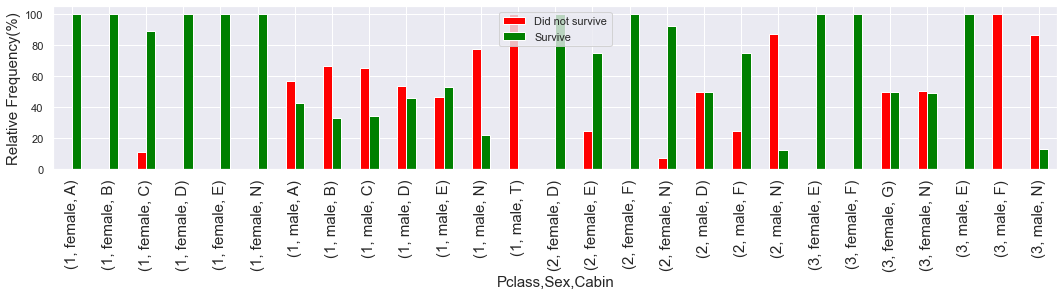

In [70]:
catVar1 = df1['Pclass']
catVar2 = df1['Sex']
catVar3 = df1['Cabin']
multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived'])

**Findings:** Sex seems to be the deciding factor once again.

<a id="point_8_3"></a>
## 8.3 (Pclass, Sex, SibSp) vs Survived

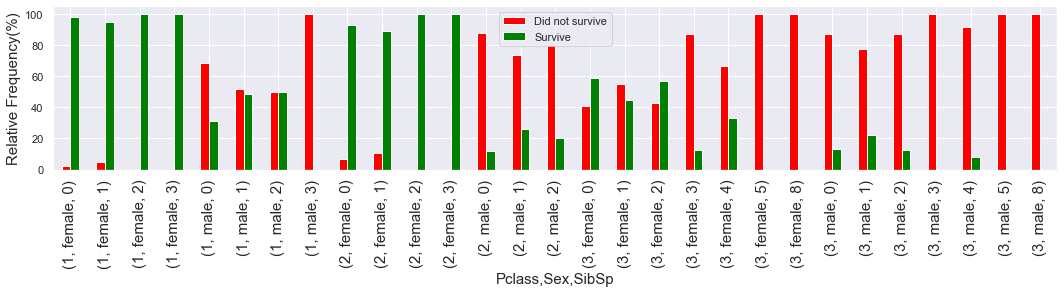

In [71]:
catVar1 = df1['Pclass']
catVar2 = df1['Sex']
catVar3 = df1['SibSp']
multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived'])

**Findings:** Pclass 3 and Male sex are the deciding factor.

<a id="point_8_4"></a>
## 8.4 (Pclass, Sex, Parch) vs Survived

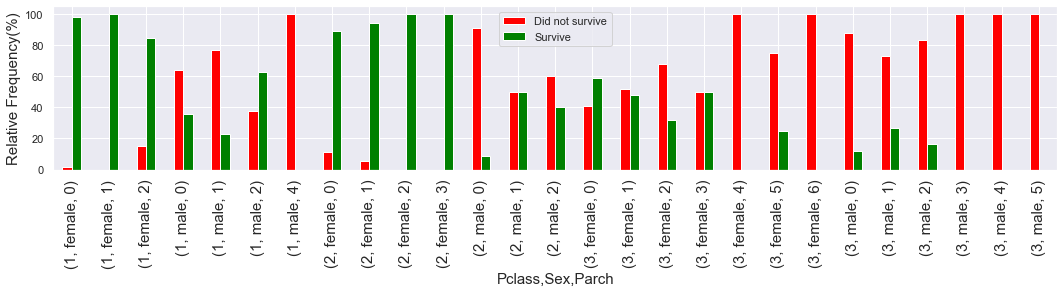

In [72]:
catVar1 = df1['Pclass']
catVar2 = df1['Sex']
catVar3 = df1['Parch']
multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived'])

**Findings:** Pclass 3 and Male sex are the deciding factor.

<a id="point_8_5"></a>
## 8.5 (Pclass, Sex, Social Status Number) vs Survived

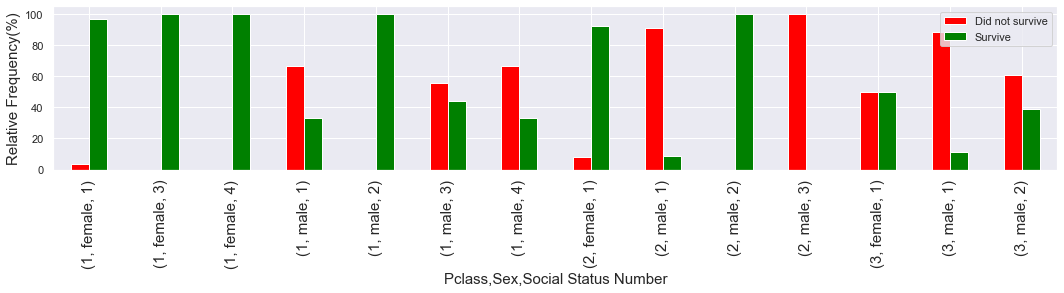

In [73]:
catVar1 = df1['Pclass']
catVar2 = df1['Sex']
catVar3 = df1['Social Status Number']
multiVariableBarPlot(catVar1, catVar2, catVar3, targetVaraible = df1['Survived'])

**Findings:** Pclass 3 and Male sex are the deciding factor.

<a id="point_9"></a>
## 9. Data Transformation
In this section, we will categorize our continuous variables. After that, redundant and useless features will be dropped. And finally categorical variables will be encoded into numerical variables to feed our machine learning models.
<br> The purpose of categorizing the the continuous variable is to prevent overfitting of the regression model as some features such as Age can be classified into catergories without a loss of valueable information.

<a id="point_9_1"></a>
## 9.1 Binning Continuous Variables
We group the continuous variables into certain pre-determined catergory.

Note: Binning continuous variables prevents overfitting which is a common problem for tree based models like decision trees and random forest etc.

<a id="point_9_1_1"></a>
## 9.11 Age

In [606]:
#Create bin categories for Age.
ageGroups = ["infant","child","teenager","youngAdult","adult","elderly"]

#Create range for each bin categories of Age.
groupRanges = [0,5,12,18,35,60,81]

#Create and view categorized Age with original Age.
df1["Age Binned"] = pd.cut(df1.Age, groupRanges, labels = ageGroups)

<a id="point_9_1_2"></a>
## 9.12 Fare

In [607]:
df1['Fare'].max()

263.0

In [608]:
#Create bin categories for Fare.
fareGroups = ["low","medium","high"]

#Create range for each bin categories of Fare.
fareGroupRanges = [-1, 33, 100, 263]

#Create and view categorized Fare with original Fare.
df1["Fare Binned"] = pd.cut(df1.Fare, fareGroupRanges, labels = fareGroups)

In [609]:
df1.head()

PassengerId         Survived  Pclass     Sex   Age  SibSp  Parch  Ticket  \
0            1  Did not survive       3    male  22.0      1      0       A   
1            2          Survive       1  female  38.0      1      0       P   
2            3          Survive       3  female  26.0      0      0       S   
3            4          Survive       1  female  35.0      1      0  Number   
4            5  Did not survive       3    male  35.0      0      0  Number   

      Fare Cabin Embarked  Social Status Number familySize  Age Binned  \
0   7.2500     N        S                     1      small  youngAdult   
1  71.2833     C        C                     1      small       adult   
2   7.9250     N        S                     1     single  youngAdult   
3  53.1000     C        S                     1      small  youngAdult   
4   8.0500     N        S                     1     single  youngAdult   

  Fare Binned  
0         low  
1      medium  
2         low  
3      medium  
4         low

<a id="point_9_2"></a>
## 9.2 Dropping Features

In [610]:
#Creating a dataframe object where I drop columns that I'll not be using subsequently
df2 = df1.drop(columns=['Age','Fare','Ticket','SibSp','Parch'])
df2.head(3)

PassengerId         Survived  Pclass     Sex Cabin Embarked  \
0            1  Did not survive       3    male     N        S   
1            2          Survive       1  female     C        C   
2            3          Survive       3  female     N        S   

   Social Status Number familySize  Age Binned Fare Binned  
0                     1      small  youngAdult         low  
1                     1      small       adult      medium  
2                     1     single  youngAdult         low

<a id="point_9_3"></a>
## 9.3 Encoding Catergorical Variables
To utilised the regression for our prediction model, we would need to convert the catergorical variables into numerical values for mathematical manipulation. There are several various to encode the catergorical variables into numerical values, for this project I'll be usig two types of encoding.
<br> The first is ordinal encoding where I'll be assigning numerical values from 0 upwards in integer value, where the numbers are assigned based off the order of the catergorical variable
<br> The second is nominal encoding, more specificially using the method called one-hot(dummary variable) encoding where there's no particular order to the different values. This is where there is no relation or order between classes therefore we do not want the algorithm to consider them under the same order.

### (a) Ordinal Encoding

In [611]:
#Family Size
familySize_dict = {'single': 1,
                  'small' : 2,
                  'medium' : 3,
                  'large' : 4}
df2['familySize Ordinal'] = df.familySize.map(familySize_dict)

In [612]:
#Age
Age_dict = {'infant': 1,
                  'child' : 2,
                  'teenager' : 3,
                  'youngAdult' : 4,
                  'adult' : 5,
                  'elderly' : 6}
df2['Age Ordinal'] = df2['Age Binned'].map(Age_dict)

In [613]:
Fare_dict = {'low': 1,
            'medium' : 2,
            'high' : 3}
df2['Fare Ordinal'] = df2['Fare Binned'].map(Fare_dict)

In [614]:
df2 = df2.drop(columns=['familySize','Age Binned','Fare Binned'])
df2.head(2)

PassengerId         Survived  Pclass     Sex Cabin Embarked  \
0            1  Did not survive       3    male     N        S   
1            2          Survive       1  female     C        C   

   Social Status Number  familySize Ordinal Age Ordinal Fare Ordinal  
0                     1                   2           4            1  
1                     1                   2           5            2

### (b) Nominal Encoding

In [615]:
#Performing Oridnal Encoding on the Survived feature
le = preprocessing.LabelEncoder()
df2['Survived'] = le.fit_transform(df2['Survived'])

In [616]:
df2.head(1)

PassengerId  Survived  Pclass   Sex Cabin Embarked  Social Status Number  \
0            1         0       3  male     N        S                     1   

   familySize Ordinal Age Ordinal Fare Ordinal  
0                   2           4            1

In [617]:
#Performing One-hot enconding(Dummy Variable) from Ordinal encoding
enc_df = df2[['PassengerId','Sex','Cabin','Embarked']]
enc_df = pd.get_dummies(enc_df)
enc_df.head()

PassengerId  Sex_female  Sex_male  Cabin_A  Cabin_B  Cabin_C  Cabin_D  \
0            1           0         1        0        0        0        0   
1            2           1         0        0        0        1        0   
2            3           1         0        0        0        0        0   
3            4           1         0        0        0        1        0   
4            5           0         1        0        0        0        0   

   Cabin_E  Cabin_F  Cabin_G  Cabin_N  Cabin_T  Embarked_C  Embarked_Q  \
0        0        0        0        1        0           0           0   
1        0        0        0        0        0           1           0   
2        0        0        0        1        0           0           0   
3        0        0        0        0        0           0           0   
4        0        0        0        1        0           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

### (c) Combining the Ordinal and Nominal Encoding

In [618]:
df3 = pd.merge(df2, enc_df, on='PassengerId', how='inner')

In [619]:
df3 = df3.drop(columns=['PassengerId','Sex','Cabin','Embarked'])

In [620]:
df3['Age Ordinal'] = df3['Age Ordinal'].astype('int64')
df3['Fare Ordinal'] = df3['Fare Ordinal'].astype('int64')

In [621]:
#Summary of the data types of the different features
df3.dtypes

Survived                int64
Pclass                  int64
Social Status Number    int64
familySize Ordinal      int64
Age Ordinal             int64
Fare Ordinal            int64
Sex_female              uint8
Sex_male                uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_G                 uint8
Cabin_N                 uint8
Cabin_T                 uint8
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
dtype: object

<a id="point_10"></a>
## 10. Model Building
The Model buiding invovled splitting the dataset into its consituents which are the predictor variables(X variables), and its depedent variable(Y variables). After which, we would fit the predictor variables into various algorithms and evaluates which model fits the data more completely.

In [622]:
#Looking at the dimension of the dataset
xTrain = df3.drop(columns = ["Survived"], axis = 1)
yTrain = df3[['Survived']]

print(f"Input Matrix Dimension: {xTrain.shape}")
print(f"Output Vector Dimension: {yTrain.shape}")

Input Matrix Dimension: (888, 19)
Output Vector Dimension: (888, 1)


In [623]:
#Looking at the names of all the different columns that we would train the dataset with
xTrain.columns

Index(['Pclass', 'Social Status Number', 'familySize Ordinal', 'Age Ordinal',
       'Fare Ordinal', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N',
       'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

<a id="point_10_1"></a>
## 10.1 Training Model
We would train 10 different classifiers for this binary classification problem.

In [646]:
seed = 43
"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#2.Support Vector Machines"""
svc = SVC(gamma = "auto")

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

"""#4.KNN"""
knn = KNeighborsClassifier()

"""#5.Gaussian Naive Bayes"""
gnb = GaussianNB()

"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)

"""#7.Gradient Boosting Classifier"""
gbc = GradientBoostingClassifier(random_state = seed)

"""#8.Adaboost Classifier"""
abc = AdaBoostClassifier(random_state = seed)

"""#9.ExtraTrees Classifier"""
etc = ExtraTreesClassifier(random_state = seed)

"""#10.Extreme Gradient Boosting"""
xgbc = XGBClassifier(random_state = seed)

"""List of all the models with their indices."""
modelNames = ["LR", "SVC", "RF", "KNN", "GNB", "DT", "GBC", "ABC", "ETC", "XGBC"]
models = [lr, svc, rf, knn, gnb, dt, gbc, abc, etc, xgbc]

In [647]:
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    model.fit(xTrain, yTrain)
    trainAccuracy = model.score(xTrain, yTrain)
    trainAccuracy = round(trainAccuracy*100, 2)
    return trainAccuracy

# Calculate train accuracy of all the models and store them in a dataframe
modelScores = list(map(calculateTrainAccuracy, models))
trainAccuracy = pd.DataFrame(modelScores, columns = ["trainAccuracy"], index=modelNames)
trainAccuracySorted = trainAccuracy.sort_values(by="trainAccuracy", ascending=False)
print("~~~~~~~ Training Accuracy of the Classifiers ~~~~~~~~~~~")
print(trainAccuracySorted)

~~~~~~~ Training Accuracy of the Classifiers ~~~~~~~~~~~
      trainAccuracy
RF            88.51
DT            88.51
ETC           88.51
XGBC          88.18
GBC           86.82
KNN           85.25
SVC           82.88
ABC           82.88
LR            82.32
GNB           70.38


**Findings:** Looks like all the tree based models have highest train accuracy followed Random Forest, Decision Tree and Extra Tree Classifier. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.

<a id="point_10_2"></a>
## 10.2 Cross Validation of Model - Using K-Fold Cross Validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [648]:
def calculateXValScore(model):
    """Returns models' cross validation scores."""
    
    xValScore = cross_val_score(model, xTrain, yTrain, cv = 10, scoring="accuracy").mean()
    xValScore = round(xValScore*100, 2)
    return xValScore

# Calculate cross validation scores of all the models and store them in a dataframe
modelScores = list(map(calculateXValScore, models))
xValScores = pd.DataFrame(modelScores, columns = ["xValScore"], index=modelNames)
xValScoresSorted = xValScores.sort_values(by="xValScore", ascending=False)

display(xValScoresSorted)

xValScore
GBC       83.23
SVC       82.67
ETC       82.55
RF        81.88
XGBC      81.88
KNN       81.76
DT        81.65
ABC       81.20
LR        80.75
GNB       70.39

<a id="point_10_3"></a>
## 10.3 Conclusion

With respect to the K-Fold Cross validation method, we can see that the top 3 models with the highest score is Gradient Boosting Classifier then Support Vector Machines and finally Extra Tree Classifer. I would be choosing the Logistic Regression model as my regression model of choice due to the relative high scoring and my personal familarity with the mathematics behind the algorithm which would allow me to implement the model more accurately without syntax or semantic(logic) error.

I would be using the statsmodel package to do my final evaluation with the summary output which would provide me with statistical values which would aid in my conclusion.

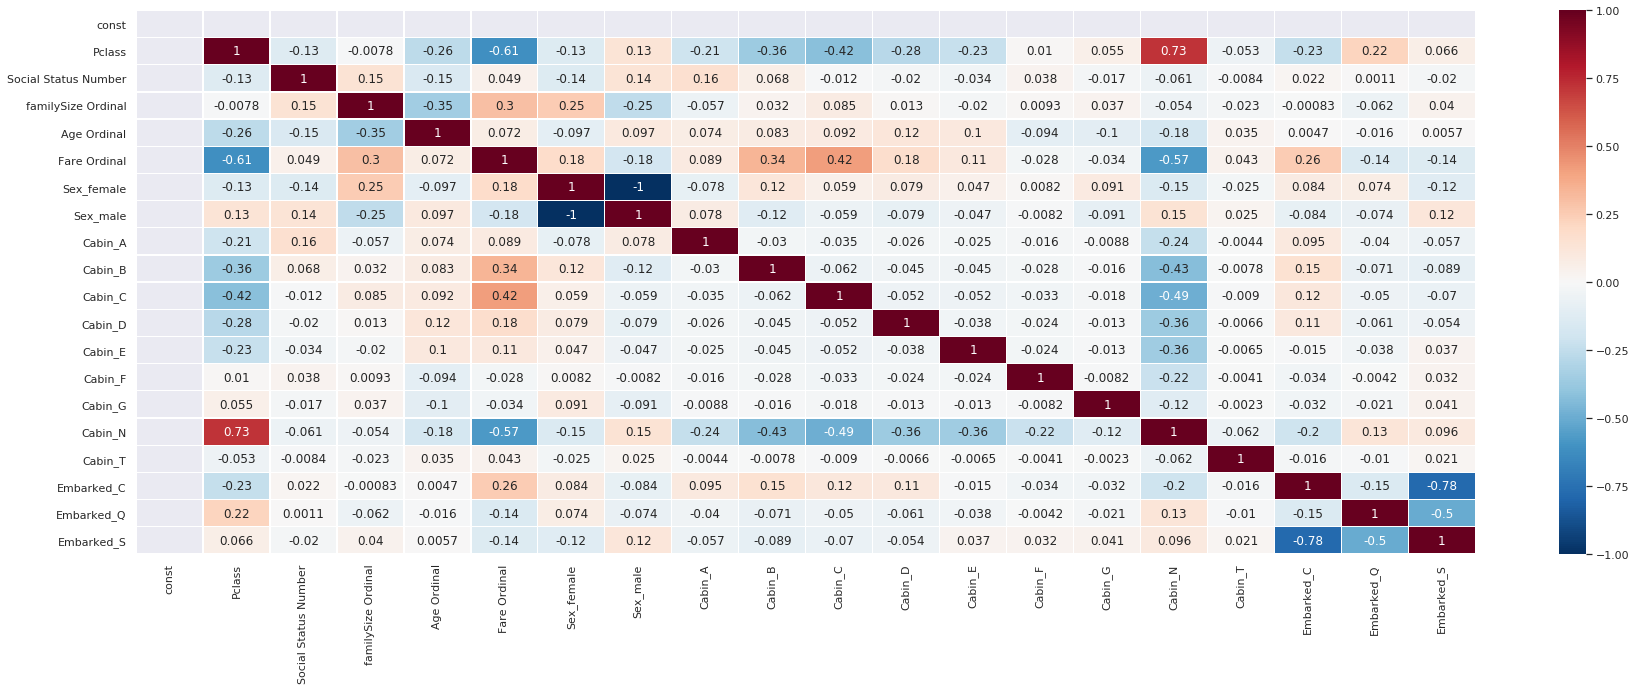

In [632]:
#Checking for collinearity
pearsoncorr = xTrain.corr(method='pearson')
#Styling
plt.figure(figsize=(30, 10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.3)

In [649]:
#Stats Model
import statsmodels.api as sm
xTrain = sm.add_constant(xTrain)
logit_model=sm.Logit(yTrain,xTrain)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.424792
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  888
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                           16
Date:                Sun, 17 May 2020   Pseudo R-squ.:                  0.3611
Time:                        07:26:58   Log-Likelihood:                -377.22
converged:                      False   LL-Null:                       -590.45
Covariance Type:            nonrobust   LLR p-value:                 1.020e-80
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2277   8.48e+06   1.45e-07      1.000   -1.66e+07    1.66e+07
Pclass                  -0.8311    

Therefore, with the highest accuracy score, Linear Regression is the model of choice to predict the survivability of passengers on board the Titanic. Through statistical and visual analysis of the predictor variables through bar plots, ANOVA test, Chi-Squared test and Bonforreoni Method we have been narrowed down to include only the Class, Sex, Cabin Number,Port of Embarkation,Social Status, Family Size, Age and Fare paid. The statiscal summary shows the R^2 value of 0.3611 (which is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model). 

<a id="point_11"></a>
# 11. Final Words & Acknowledgement

Thank you for viewing this project. If there's any constructive criticisms or feedback, I would greatly appreciate you sharing with me as I'm in this jounrney to learn new things and I can be contacted at james_gan@mymail.sutd.edu.sg

This project would also not be possible without the community in Kaggle whom I referred to for questions and gain much inspirations and knowledge from viewing other similar projects to create this current notebook above.